In [1]:
import pandas as pd

## 과제 1: Datetime Basics

In [2]:
transactions = pd.read_csv('./data/retail/transactions.csv', parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [4]:
transactions['date'].max()

Timestamp('2017-08-15 00:00:00')

In [5]:
# Difference between date and max-date
transactions['time_to_last_date'] = transactions['date'].max() - transactions['date']

# Dateparts
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
# 월요일(0), 일요일(6)
transactions['day_of_week'] = transactions['date'].dt.weekday

# Format Date
transactions['date'] = transactions['date'].dt.strftime('%Y-%B-%d')

transactions.head()

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2


## 과제 2: Time Delta

In [6]:
transactions.head()

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2


In [7]:
transactions.assign(
    time_to_last_date=pd.to_timedelta(3, unit='W') + transactions['time_to_last_date'],
    weeks_to_last_date=(lambda x: x['time_to_last_date'].dt.days / 7)
).head()

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week,weeks_to_last_date
0,2013-January-01,25,770,1708 days,2013,1,1,244.000000
1,2013-January-02,1,2111,1707 days,2013,1,2,243.857143
2,2013-January-02,2,2358,1707 days,2013,1,2,243.857143
3,2013-January-02,3,3487,1707 days,2013,1,2,243.857143
4,2013-January-02,4,1922,1707 days,2013,1,2,243.857143


## 과제 3: Time Series 결측값

In [8]:
oil = pd.read_csv('./data/retail/oil.csv', index_col='date', parse_dates=True)
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [9]:
oil.index.dtype

dtype('<M8[ns]')

In [10]:
oil.mean()

dcoilwtico    67.714366
dtype: float64

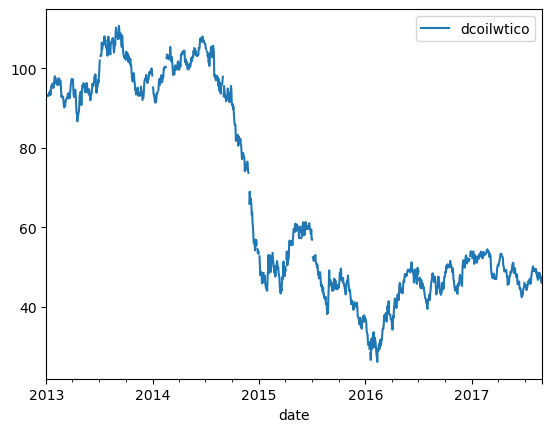

In [11]:
oil.plot();

In [12]:
print(
    oil.ffill().mean(),
    oil.bfill().mean(),
    oil.interpolate().mean()
)

dcoilwtico    67.671249
dtype: float64 dcoilwtico    67.673325
dtype: float64 dcoilwtico    67.661824
dtype: float64


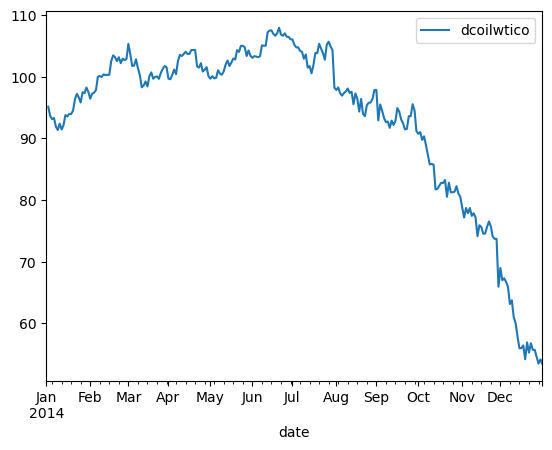

In [13]:
oil.loc['2014'].ffill().plot();

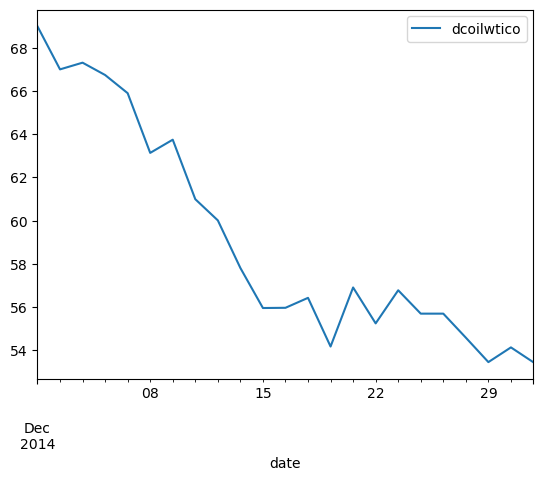

In [14]:
oil.loc['2014-12'].ffill().plot();

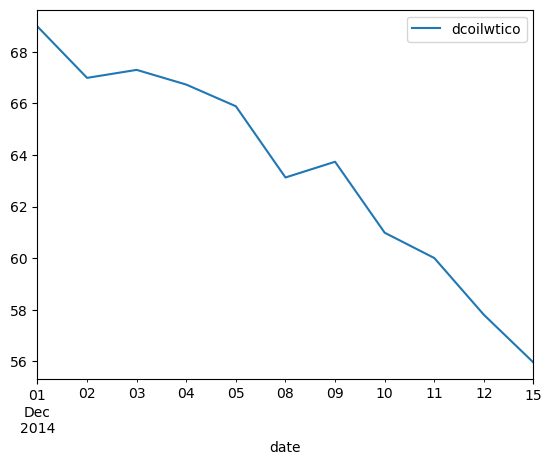

In [15]:
oil.loc['2014-12-01':'2014-12-15'].ffill().plot();

## 과제 4: Shifting Series
diff 메서드

In [16]:
transactions = pd.read_csv('./data/retail/transactions.csv', parse_dates=['date'])

transactions_47 = transactions.loc[transactions['store_nbr'] == 47, ['date', 'transactions']]
transactions_47.head()

,date,transactions
41,2013-01-02,4161
87,2013-01-03,3660
133,2013-01-04,3915
179,2013-01-05,4764
225,2013-01-06,4935


In [17]:
transactions_47 = (
    transactions_47
    .groupby([transactions['date'].dt.year, transactions['date'].dt.month])
    .sum(numeric_only=True)
)

transactions_47

transactions
date date              
2013 1           109668
     2           103706
     3           116873
     4           108571
     5           113532
     6           110637
     7           107506
     8           112001
     9           114468
     10          114585
     11          114436
     12          150204
2014 1           114190
     2           107175
     3           121771
     4           122976
     5           126298
     6           118398
     7           118522
     8           121949
     9           115552
     10          116741
     11          116996
     12          147371
2015 1           118445
     2           108186
     3           119883
     4           118449
     5           120810
     6           110814
     7           116234
     8           119307
     9           112975
     10          117712
     11          117564
     12          149747
2016 1           108521
     2           111132
     3           116599
     4           117046
     5           115799
     6           108539
     7           114724
     8           114185
     9           112026
     10          116242
     11          118587
     12          149367
2017 1           118000
     2           109254
     3           119122
     4           119174
     5           120941
     6           114171
     7           120588
     8            57541

In [18]:
transactions_47['year_prior'] = transactions_47['transactions'].shift(12)
transactions_47.head(24)

transactions  year_prior
date date                          
2013 1           109668         NaN
     2           103706         NaN
     3           116873         NaN
     4           108571         NaN
     5           113532         NaN
     6           110637         NaN
     7           107506         NaN
     8           112001         NaN
     9           114468         NaN
     10          114585         NaN
     11          114436         NaN
     12          150204         NaN
2014 1           114190    109668.0
     2           107175    103706.0
     3           121771    116873.0
     4           122976    108571.0
     5           126298    113532.0
     6           118398    110637.0
     7           118522    107506.0
     8           121949    112001.0
     9           115552    114468.0
     10          116741    114585.0
     11          116996    114436.0
     12          147371    150204.0

In [19]:
transactions_47.loc[2015]

,transactions,year_prior
date,,
1,118445,114190.0
2,108186,107175.0
3,119883,121771.0
4,118449,122976.0
5,120810,126298.0
6,110814,118398.0
7,116234,118522.0
8,119307,121949.0
9,112975,115552.0


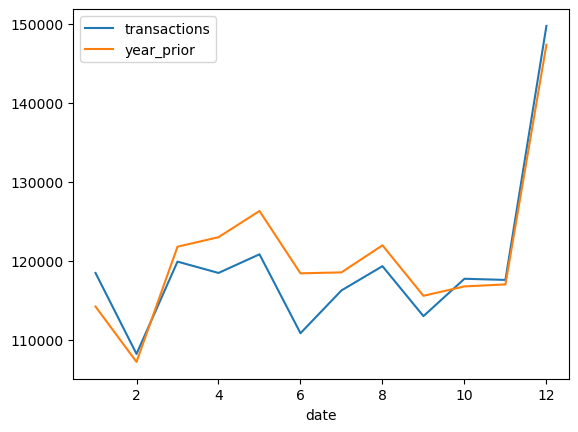

In [20]:
transactions_47.loc[2015].plot();

## 과제 5: Time Series 리샘플링

In [21]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


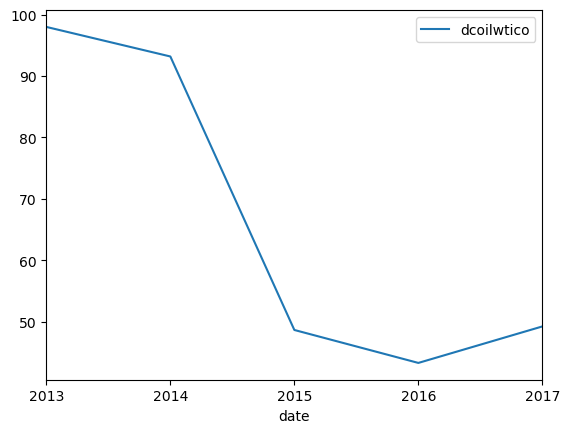

In [22]:
oil.resample('Y').mean().plot();

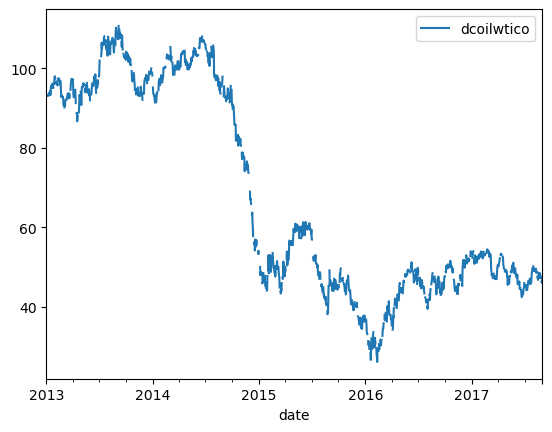

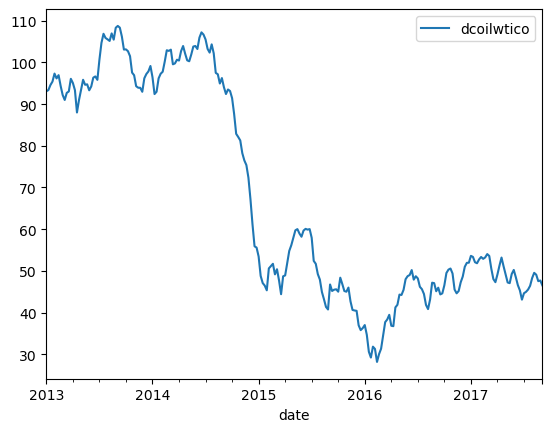

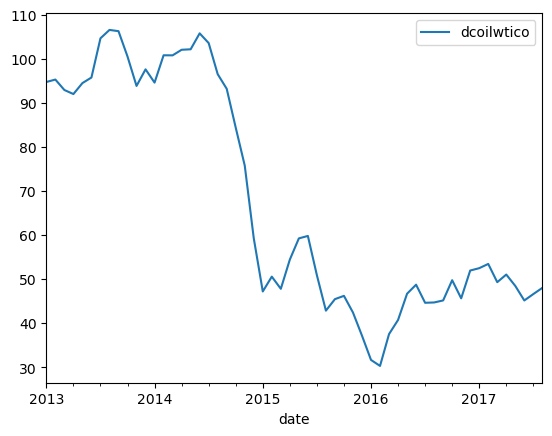

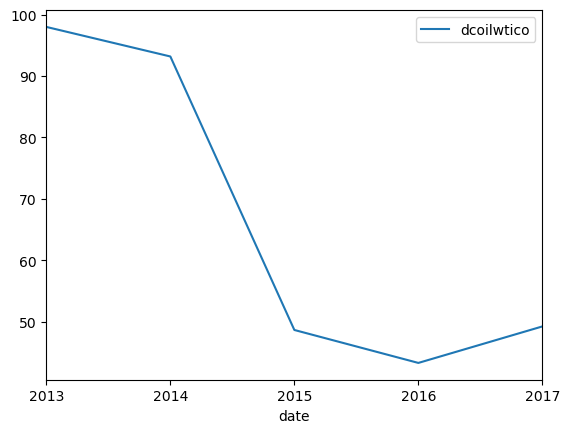

In [23]:
for period in ['D', 'W', 'M', 'A']:
    oil.resample(period).mean().plot();

## 과제 6: Rolling Aggregation

In [24]:
transactions_47 = (
    transactions
    .loc[transactions['store_nbr'] == 47, ['date', 'transactions']]
    .set_index('date')
)

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


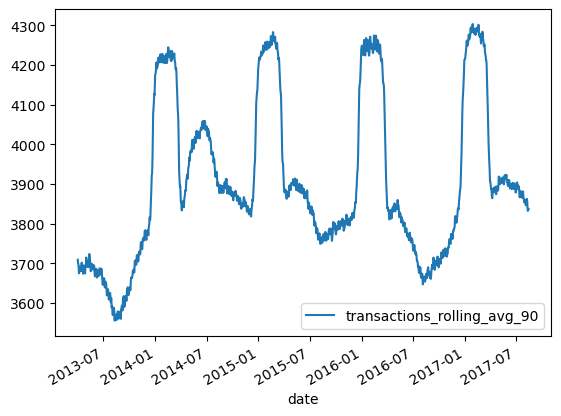

In [25]:
(
    transactions_47
    .assign(
        transactions_rolling_avg_90=transactions_47.rolling(90).mean())
    .drop('transactions', axis=1)
    .plot()
);